In [1]:
# %pip install universal-portfolios
%matplotlib inline

import numpy as np
import pandas as pd
# from pandas.io.data import DataReader
from datetime import datetime
# import six
import universal as up
from universal import tools
from universal import algos
import logging
# we would like to see algos progress
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.DEBUG)

import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['figure.figsize'] = (16, 10) # increase the size of graphs
# mpl.rcParams['legend.fontsize'] = 12
# mpl.rcParams['lines.linewidth'] = 1
# default_color_cycle = mpl.rcParams['axes.color_cycle'] # save this as we will want it back later

2019-11-12 15:22:50,687 Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import pandas as pd
import numpy as np
# import xarray as xr
import os

df = {}
closes = {}
for i in range(10):
    data = pd.read_csv('./data/'+str(i)+'.csv')
    code = data.Code.unique()[0]
    time = pd.to_datetime(data.Date)
    # print(time)
    closes[code] = data.Close

c = pd.DataFrame(closes)


In [3]:
c = c.drop(c.tail(2).index)
print(c.head())
print(c.tail())
print(c.shape)

    C.DCE  EG.DCE  I.DCE   J.DCE  JM.DCE   L.DCE   M.DCE   P.DCE  PP.DCE  \
0  1940.0  4483.0  835.0  2135.5  1371.5  8185.0  2788.0  4248.0  8847.0   
1  1940.0  4483.0  838.0  2137.5  1372.5  8190.0  2784.0  4248.0  8877.0   
2  1939.0  4478.0  836.0  2136.5  1374.0  8185.0  2784.0  4242.0  8869.0   
3  1939.0  4484.0  836.0  2137.0  1373.0  8185.0  2782.0  4248.0  8887.0   
4  1939.0  4486.0  835.0  2134.5  1374.0  8180.0  2789.0  4248.0  8886.0   

    Y.DCE  
0  5422.0  
1  5418.0  
2  5414.0  
3  5414.0  
4  5420.0  
        C.DCE  EG.DCE  I.DCE   J.DCE  JM.DCE   L.DCE   M.DCE   P.DCE  PP.DCE  \
27010  1889.0  4571.0  619.0  1737.5  1219.5  7235.0  2878.0  5232.0  7950.0   
27011  1890.0  4572.0  619.0  1737.0  1219.5  7230.0  2877.0  5234.0  7948.0   
27012  1890.0  4572.0  618.5  1738.0  1219.5  7225.0  2871.0  5236.0  7948.0   
27013  1890.0  4571.0  619.0  1738.0  1218.0  7225.0  2871.0  5232.0  7948.0   
27014  1891.0  4570.0  618.0  1739.0  1218.0  7220.0  2872.0  5238.0  7

2019-11-12 15:01:46,286 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2019-11-12 15:01:46,287 findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,288 findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,289 findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2019-11-12 15:01:46,290 findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-12 15:01:46,290 findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2019-11-12 15:01:46,291 findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2019-11-12 15:01:46,292 findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-12 15

2019-11-12 15:01:46,355 findfont: score(<Font 'Arimo' (Arimo-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-12 15:01:46,356 findfont: score(<Font 'Cabin' (Cabin-MediumItalic.otf) italic normal medium normal>) = 11.145
2019-11-12 15:01:46,357 findfont: score(<Font 'STIXNonUnicode' (STIXNonUnicode-Bold.otf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,360 findfont: score(<Font 'STIXIntegralsUpD' (STIXIntegralsUpD-Bold.otf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,363 findfont: score(<Font 'Go' (Go-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,364 findfont: score(<Font 'Gentium Book Basic' (GenBkBasR.ttf) normal normal book normal>) = 10.05
2019-11-12 15:01:46,365 findfont: score(<Font 'Noto Sans Arabic' (NotoSansArabic-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,365 findfont: score(<Font 'Accanthis ADF Std No3' (AccanthisADFStdNo3-Regular.otf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,366 fi

2019-11-12 15:01:46,446 findfont: score(<Font 'Baekmuk Dotum' (dotum.ttf) normal normal 400 normal>) = 10.05
2019-11-12 15:01:46,446 findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,447 findfont: score(<Font 'GFS Solomos' (GFSSolomos.otf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,448 findfont: score(<Font 'FreeMono' (FreeMonoOblique.otf) oblique normal 400 normal>) = 11.05
2019-11-12 15:01:46,448 findfont: score(<Font 'STIXSizeTwoSym' (STIXSizeTwoSym-Regular.otf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,449 findfont: score(<Font 'Go' (Go-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,450 findfont: score(<Font 'Linux Biolinum Keyboard O' (LinBiolinum_K.otf) normal normal 400 normal>) = 10.05
2019-11-12 15:01:46,453 findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,454 findfo

2019-11-12 15:01:46,532 findfont: score(<Font 'Noto Sans Arabic UI' (NotoSansArabicUI-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,532 findfont: score(<Font 'STIXVariants' (STIXVariants-Bold.otf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,533 findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,534 findfont: score(<Font 'Noto Kufi Arabic' (NotoKufiArabic-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,536 findfont: score(<Font 'Noto Sans Bengali' (NotoSansBengali-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,537 findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-12 15:01:46,538 findfont: score(<Font 'Lato' (Lato-LightItalic.ttf) italic normal light normal>) = 11.24
2019-11-12 15:01:46,538 findfont: score(<Font 'Roboto Condensed' (RobotoCondensed-LightItalic.ttf) italic

2019-11-12 15:01:46,605 findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,606 findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-12 15:01:46,607 findfont: score(<Font 'Noto Sans' (NotoSans-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,611 findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,611 findfont: score(<Font 'Noto Serif Georgian' (NotoSerifGeorgian-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,612 findfont: score(<Font 'Noto Sans Malayalam' (NotoSansMalayalam-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,613 findfont: score(<Font 'Tinos' (Tinos-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-12 15:01:46,613 findfont: score(<Font 'Padauk' (Padauk-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-12

2019-11-12 15:01:46,682 findfont: score(<Font 'AR PL KaitiM Big5' (bkai00mp.ttf) normal normal 400 normal>) = 10.05
2019-11-12 15:01:46,683 findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 0.5349999999999999
2019-11-12 15:01:46,684 findfont: score(<Font 'Tinos' (Tinos-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-12 15:01:46,685 findfont: score(<Font 'Noto Sans Glagolitic' (NotoSansGlagolitic-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,686 findfont: score(<Font 'Noto Serif' (NotoSerif-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,688 findfont: score(<Font 'Noto Sans Sinhala' (NotoSansSinhala-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,688 findfont: score(<Font 'Roboto' (Roboto-LightItalic.ttf) italic normal light normal>) = 11.24
2019-11-12 15:01:46,689 findfont: score(<Font 'GFS Didot' (GFSDidotItalic.otf) italic normal 400 normal>) = 11.0

2019-11-12 15:01:46,828 findfont: score(<Font 'Universalis ADF Std' (UniversalisADFStd-BoldCondObl.otf) italic normal bold condensed>) = 11.535
2019-11-12 15:01:46,829 findfont: score(<Font 'FreeSans' (FreeSans.otf) normal normal 400 normal>) = 10.05
2019-11-12 15:01:46,830 findfont: score(<Font 'Noto Sans Kannada UI' (NotoSansKannadaUI-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,831 findfont: score(<Font 'Bold Oblique' (UniversalisADFStd-BoldOblique.otf) oblique normal bold normal>) = 11.335
2019-11-12 15:01:46,831 findfont: score(<Font 'Universalis ADF Std' (UniversalisADFStd-CondOblique.otf) oblique normal 400 condensed>) = 11.25
2019-11-12 15:01:46,832 findfont: score(<Font 'GFS Baskerville' (GFSBaskerville.otf) normal normal regular normal>) = 10.05
2019-11-12 15:01:46,832 findfont: score(<Font 'Linux Libertine O' (LinLibertine_RB.otf) normal normal bold normal>) = 10.335
2019-11-12 15:01:46,833 findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic 

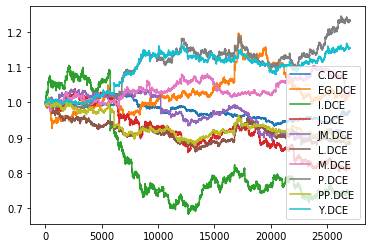

In [4]:
data = c/c.iloc[0]
data.plot()
plt.show()

## Leverage

Multiply price relatives with leverage ratios

In [5]:
# print(data.head())
# data['JM.DCE'] *= (100/15)   # Coking Coal
# data['P.DCE'] *= 10          # Palm Oil
# data['I.DCE'] *= (100/15)    # Iron ore
# data['Y.DCE'] *= 10          # Soybean Oil
# data['C.DCE'] *= 10          # Corn
# data['PP.DCE'] *= 10         # Polypropylene
# data['M.DCE'] *= (100/11)    # Soybean Meal
# data['EG.DCE'] *= (100/12)   # Ethylene Glycol
# data['L.DCE'] *= 10          # Plastic
# data['J.DCE'] *= (100/15)    # Coke
# print(data.head())

In [6]:
# print(result.summary())
# result.plot(weights=False, assets=False, ucrp=True, logy=True)

In [7]:
# swensen_allocation = [0.3, 0.15, 0.1, 0.15, 0.15, 0.15]  

#list all the algos
olps_algos = [
algos.Anticor(),
algos.BAH(),
algos.BCRP(),
# algos.BNN(),
# algos.CORN(),
algos.CRP(), 
algos.CWMR(),
algos.EG(),
algos.Kelly(),
algos.OLMAR(),
algos.ONS(),
algos.PAMR(),
algos.RMR(),
# algos.UP()
]

In [8]:
# put all the algos in a dataframe
algo_names = [a.__class__.__name__ for a in olps_algos]
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos

In [9]:
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    olps_train.ix[name,'results'] = alg.run(data)

2019-11-12 15:01:48,103 Running Anticor...
/home/dex/anaconda3/envs/ml/lib/python3.6/site-packages/universal/tools.py:254: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  ret[col] = rolling_m(ret[col], *args, **kwargs)
/home/dex/anaconda3/envs/ml/lib/python3.6/site-packages/universal/tools.py:270: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  RXY[:, i, j] = rolling_m(x[col_x] * y[col_y], **kwargs) - EX[col_x] * EY[col_y]
/home/dex/anaconda3/envs/ml/lib/python3.6/site-packages/universal/algos/anticor.py:43: UserWarning: scipy.weave is not available in python3, falling back to python version
  warnings.warn('scipy.weave is not available in python3, falling back to python version')
2019-11-12 15:01:53,221 Anticor finished successfully.
/home/dex/anaconda3/envs/ml/lib

In [10]:
# Let's make sure the fees are set to 0 at first
for k, r in olps_train.results.iteritems():
#     print(k, r)
    r.fee = 1e-4

/home/dex/anaconda3/envs/ml/lib/python3.6/site-packages/universal/result.py:102: RuntimeWarning: invalid value encountered in log
  self.r_log = np.log(self.r)


In [11]:
# we need 14 colors for the plot
n_lines = 12
color_idx = np.linspace(0, 1, n_lines)
cmap = plt.cm.coolwarm
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cmap(np.linspace(0, 1, n_lines)))
plt.rc('axes', prop_cycle=(mpl.cycler(color=cmap(np.linspace(0, 1, n_lines)))))


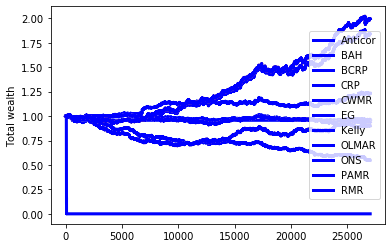

In [12]:
# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
ax = olps_train.results[0].plot(assets=False, weights=False, ucrp=False, portfolio_label=olps_train.index[0])
ax[0].set_prop_cycle(mpl.cycler(color=cmap(np.linspace(0, 1, n_lines))))
for k, r in olps_train.results.iteritems():
    if k == olps_train.results.keys()[0]: # skip the first item because we have it already
        continue
    r.plot(assets=False, weights=False, ucrp=False, portfolio_label=k, ax=ax[0])
# plt.legend(loc='best')
plt.show()

In [13]:
def olps_stats(dff):
    df = pd.DataFrame()
    for name, r in dff.results.iteritems():
        df.ix[name,'profit'] = r.profit_factor
        df.ix[name,'sharpe'] = r.sharpe
        df.ix[name,'information'] = r.information
        df.ix[name,'annualized_return'] = r.annualized_return * 100
        df.ix[name,'drawdown_period'] = r.drawdown_period
        df.ix[name,'winning_pct'] = r.winning_pct * 100
        df.ix[name, 'VaR(90%)'] = r.var90
        df.ix[name, 'VaR(95%)'] = r.var95
        df.ix[name, 'VaR(99%)'] = r.var99
    return df

In [14]:
olps_stats(olps_train)


/home/dex/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,profit,sharpe,information,annualized_return,drawdown_period,winning_pct,VaR(90%),VaR(95%),VaR(99%)
Anticor,0.926862,-0.378390,-0.404204,-0.555570,26895.0,49.040042,-0.001211,-0.001548,-0.002180
BAH,0.988735,-0.062258,0.041783,-0.034774,21368.0,49.476217,-0.000452,-0.000580,-0.000820
BCRP,1.033917,0.167108,0.216863,0.195514,7834.0,49.684851,-0.000936,-0.001203,-0.001705
CRP,0.987875,-0.067896,-1.339487,-0.038625,21368.0,49.468814,-0.000461,-0.000591,-0.000835
CWMR,0.836148,-0.164097,-0.005567,-0.040665,26715.0,45.725916,-0.000202,-0.000258,-0.000365
EG,0.987907,-0.067678,-0.349830,-0.038454,21368.0,49.465112,-0.000460,-0.000590,-0.000834
Kelly,0.831006,-0.564447,-0.564225,-44.807229,27014.0,49.312071,-0.087364,-0.111462,-0.156665
OLMAR,1.076634,0.373330,0.456886,0.570053,7276.0,52.979971,-0.001207,-0.001555,-0.002209
ONS,0.986325,-0.078819,-0.058415,-0.061821,21368.0,49.442902,-0.000636,-0.000815,-0.001152
PAMR,0.987605,-0.066402,-0.047236,-0.099066,26715.0,47.993130,-0.001209,-0.001551,-0.002191
